In [420]:
from sympy import *
init_printing()

In [421]:
A = Symbol('A', real=True, positive=True)
N = Symbol('N', odd=True)

In [422]:
def lambda_n(n_num: Integer, A_num: RealNumber=A, N_num: Integer=N):
    symb = symbols('\\lambda_{{{}}}'.format(n_num).replace(' ',''))
    coef = 2*(-1)**((n_num-1)/2)/n_num/pi * (2/A_num)**n_num * binomial((N_num+n_num)/2,(N_num-n_num)/2)

    return Eq(symb,coef)

In [423]:
from matplotlib import pyplot
from numpy import arange, linspace, argmin, log as np_log, asarray, abs as np_abs
from sympy import N as numeric_value_of

In [471]:
sol = solve(Eq(1/N*(2/A)**N, (N+1)/A), A)[0]
sol

In [483]:
sol.subs(N, N_num)

1.993939393939394


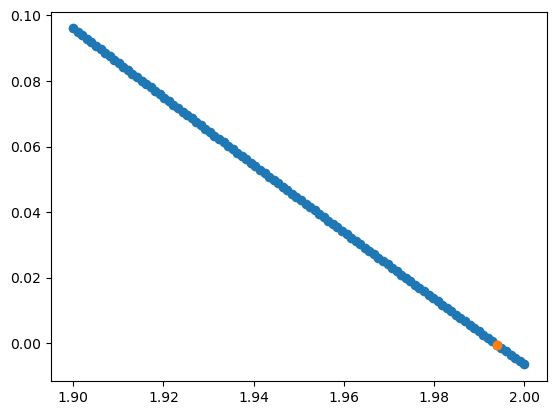

In [464]:
N_num = Integer(5001)

funky = lambda x: 2*log(x)/N_num

A_array = linspace(1.9, 2, 100)

def f(A_num):
    num = funky(lambda_n(N_num, A_num, N_num).rhs)
    den = funky(lambda_n(1, A_num, N_num).rhs)

    return num-den

ratios = asarray([f(A_num) for A_num in A_array])

pyplot.scatter(A_array, ratios)

index_nearest_to_zero = argmin(np_abs(ratios))
print(A_array[index_nearest_to_zero])
pyplot.scatter(A_array[index_nearest_to_zero], ratios[index_nearest_to_zero])


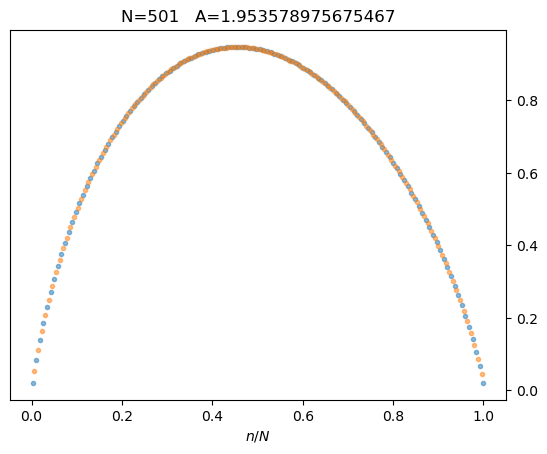

In [486]:
N_num = Integer(501)
A_num = float(2**Rational(N_num,N_num-1)*(N_num*(N_num+1))**Rational(-1,N_num-1))

kappa = 10
#funky = lambda x: exp(kappa*2*log(x)/N_num/3)
funky = lambda x: 2*log(x)/N_num
#funky = lambda x: x

funky_n = lambda x: x/N_num

lambdas_positive = [ lambda_n(Integer(n_num), A, N_num).rhs for n_num in range(1, N_num+2, 4) ]
lambdas_negative = [-lambda_n(Integer(n_num), A, N_num).rhs for n_num in range(3, N_num+2, 4) ]

lambdas_positive_num = asarray([ numeric_value_of(funky(lamby.subs(A, float(A_num)))) for lamby in lambdas_positive])
lambdas_negative_num = asarray([ numeric_value_of(funky(lamby.subs(A, float(A_num)))) for lamby in lambdas_negative])

n_positive = funky_n(arange(1, N_num+2, 4))
n_negative = funky_n(arange(3, N_num+2, 4))

ax = pyplot.scatter(n_positive, lambdas_positive_num, marker='.', alpha=0.5)
pyplot.scatter(n_negative, lambdas_negative_num, marker='.', alpha=0.5)
pyplot.xlabel('$n/N$')
#pyplot.ylabel('$\\left(\\dfrac{2}{N}\\text{log}|\\lambda_n|\\right)$')
pyplot.title(f"N={N_num}   A={A_num}")

ax.axes.yaxis.tick_right()
ax.axes.yaxis.set_label_position("right")


In [487]:
def Gamma(nu, N):
    N2 = N/2
    nuN = nu*N
    
    factor = (1+nu)/(1-nu)/nuN

    num = gamma(N2*(1+nu))
    den = gamma(N2*(1-nu))*gamma(nuN)

    return factor * num/den


NameError: name 'Gamma' is not defined